In [1]:
using Plots
using Random
using Colors, ColorSchemes

In [2]:
function grow(colonies,space,t,x,y,event_stack,beta)
    function add_event(x,y)
        dt = trunc(Int,exp(space[x,y]*beta))+t
        insert!(event_stack,searchsorted(event_stack,dt,by=first).start,[dt,x,y])
    end
    
    if colonies[x,y]<0
        return false
    end
    if colonies[x,y]==0
        colonies[x,y]=1
        add_event(x+1,y)
        add_event(x-1,y)
        add_event(x,y+1)
        add_event(x,y-1)       
    end
    return true
end;

In [3]:
g_size = 2002;
colonies = fill(Int8(-1),g_size,g_size);
colonies[2:end-1,2:end-1] .= 0;
space=rand(Float64, (g_size, g_size))
event_stack = []
beta = 25
grow(colonies,space,0,div(g_size,2),div(g_size,2),event_stack,25)
flag = true
while(flag)
    e = popfirst!(event_stack);
    flag = grow(colonies,space,e[1],e[2],e[3],event_stack,beta);
end;

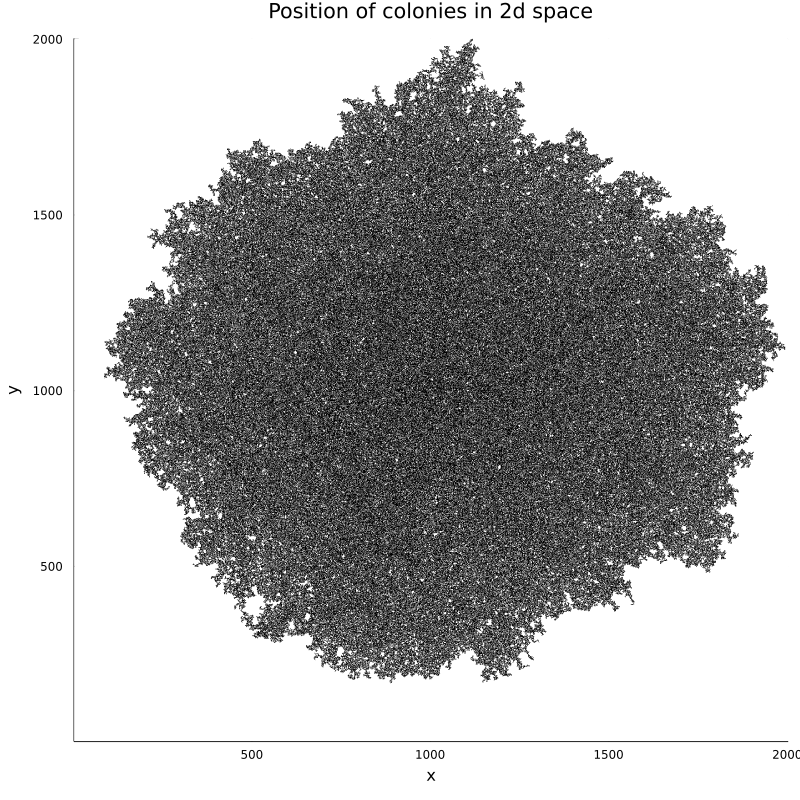

In [4]:

mycmap = ColorScheme([RGB{Float64}(1, 1,1),RGB{Float64}(0, 0,0)])

heatmap(2:g_size,
    2:g_size, colonies[2:end-1,2:end-1],
    c=cgrad(mycmap),
    xlabel="x", ylabel="y",
    title="Position of colonies in 2d space",
    size=(800,800),
    legend = :none)